# Intro to Neural Networks


In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

<img src="img/move_on.jpg" width=400>

### Remember when we went from linear to logistic regression?

<img src="img/linear_vs_logistic_regression.jpg" width=650>

### Use a linear combination of variables

$$ \hat y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2, x_2 +\ldots + \beta_n x_n $$

### And passed the sum product of those variables and coefficients through a sigmoid function.

$$ P(y) = \displaystyle \frac{1}{1+e^{-(\hat y)}}$$

![sig](img/SigmoidFunction_701.gif)

### Another way of writing this:

<img src="img/log_reg_deriv.png" width=500>

### If we change the orientation of the first part, we get a new diagram:
<img src="img/log_reg.png" width=500>

### _Logistic Regression_ was our first introduction to a Neural Network(NN):
<img src="img/log_reg.png" width=500>

<img src="img/dogcat.gif" width=500>

### A more general notation for a single layer NN:
![fnn](img/First_network.jpg)

### New vocabulary!

- input layer
- weights
- hidden layer
- summation function
- activation function
- output

## Input layer

The input layer of a neural network is the list of variables we are using in our model.

<img src="img/log-reg-nn-ex-i.png" width=500>

## Weights

In the case of logistic regression, the weights here are the coefficients we are adjusting to fit our model. In other Neural Networks, the weights are a combination of scalar transformations and matrix multiplication on any of the input variables.

<img src="img/log-reg-nn-ex-w.png" width=500>

## Summation function

<img src="img/log-reg-nn-ex-sum.png" width=500>

## Activation function

In logistic regression we use a **sigmoid** activation function. Other options you might see are **linear**, **Tanh** and **ReLu**.<br>
[Loss functions for neural networks](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html)
<img src="img/log-reg-nn-ex-a.png" width=500>

## Deeper networks = more hidden layers

![dnn](img/Deeper_network.jpg)

## Why _hidden_ layers?

They are hidden because we do not specify them. They could represent latent factors (as with matrix decomposition), or a combination of the existing variables into new features.

![ic-nn](img/Ice_cream_network.jpg)

## But why _neural_ ?

![neuron-bio](img/neuron.png)

## Inspiration from Actual Neurons

"The signaling process is partly electrical and partly chemical. Neurons are electrically excitable, due to maintenance of voltage gradients across their membranes. If the voltage changes by a large enough amount over a short interval, the neuron generates an all-or-nothing electrochemical pulse called an action potential. This potential travels rapidly along the axon, and activates synaptic connections as it reaches them. Synaptic signals may be excitatory or inhibitory, increasing or reducing the net voltage that reaches the soma." (https://en.wikipedia.org/wiki/Neuron)

Another important idea from neurology is the "all-or-none" principle: <br/> (https://en.wikipedia.org/wiki/Neuron#All-or-none_principle)

### The biology comparison 

Neural networks draw their inspiration from the biology of our own brains, which are of course also accurately described as 'neural networks'. A human brain contains around $10^{11}$ neurons, connected very densely.

One of the distinctive features of a neuron is that it has a kind of activation potential: If the electric signal reaching a neuron is strong enough, the neuron will fire, sending electrical signals further along the network. Thus  there is a kind of input-output structure to neurons that the artificial networks will be mimicking.

## Important differences 

Having input, output, and bias: This should so far sound _**much**_ like _**linear regression**_.
Have the computer choose weights on the various input parameters so as to optimize the predictions on outputs.

But there are, of course, **important** differences, how the model trains on the data and how it adjusts for error.

## Model Training - batches

![toomuch](img/much-data-too-much-data.jpg)

Unlike other models that can take all the data in the trianing set, Neural nets generally don't accept the entire dataset all at once. Thus we often want to specify a *batch size*, which will break our data up into chunks of that size.

Example: $ 1,000$ data points, _batch size_ **500**

## Model Training - epochs
![epock](img/2014-10-28_anthropocene.png)

When all four batches of 500 observations go through the NN, one **epoch** is completed. 


Generally speaking, one epoch is NOT enough to see significant error reduction. But, because of the power of gradient descent, there are often very significant strides  made after a few tens or hundreds of epochs.

## Back propagation - adjusting weights
Moreover, neural nets are dynamic in the sense that, after a certain number of data points have been passed through the model, the weights will be *updated* with an eye toward optimizing our loss function. (Thinking back to biological neurons, this is like revising their activation potentials.) Typically, this is  done  by using some version of gradient descent, but [other approaches have been attempted](https://arxiv.org/abs/1605.02026).

![bprop](img/BackProp_web.png)

## Back propagation - visualized

![bb](img/ff-bb.gif)

## Details of Back Propagation
One of the most popular optimizers these days is called 'Adam', which generalizes from ordinary gradient descent by having individual and dynamic learning rates. [This article](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/) has a nice discussion of Adam.

For the mathematical details, check out [this post](https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/).

Given that we are only passing *some* data points through at any one time, the question of *when* to update the weights becomes pressing. Standardly, we'd wait until we've passed all the data through before updating, but we might try updating after each batch ("batch gradient descent") or even after each point ("stochastic gradient descent"). [This post](https://datascience.stackexchange.com/questions/27421/when-are-weights-updated-in-cnn) has more details.

## Who Cares?

Remember graph theory? [Neural networks are much like computational graphs](https://medium.com/tebs-lab/deep-neural-networks-as-computational-graphs-867fcaa56c9). (This is why Tensorflow is useful for constructing neural networks! More on this tomorrow.)

And computational graphs can be used [to approximate *any* function](http://neuralnetworksanddeeplearning.com/chap4.html).

## Activation Functions

Some common activation functions:

**binary step**: $f(x) = 0$ if $x\leq 0$; $f(x) = 1$ otherwise

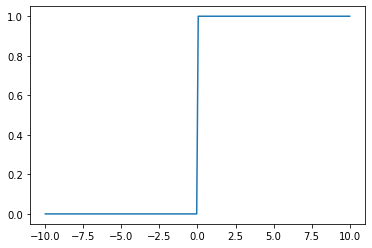

In [4]:
# Coding binary step:

X = np.linspace(-10, 10, 200)
y_bs = list(np.zeros(100))
y_bs.extend(list(np.ones(100)))

plt.plot(X, y_bs);

**ReLU**: $f(x) = 0$ if $x\leq 0$; $f(x) = x$ otherwise

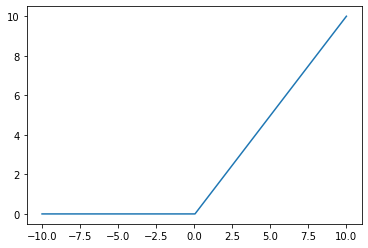

In [5]:
# Coding ReLU:

y_relu = list(np.zeros(100))
y_relu.extend(np.linspace(0, 10, 100))

plt.plot(X, y_relu);

**Sigmoid**: $f(x) = \frac{1}{1 + e^{-x}}$

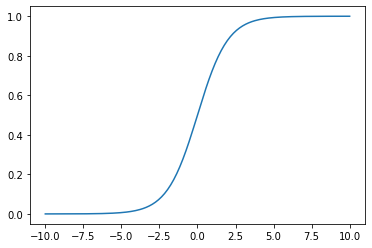

In [6]:
# Coding Sigmoid:

y_sig = 1 / (1 + np.exp(-X))

plt.plot(X, y_sig);

**tanh**: $f(x) = tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$

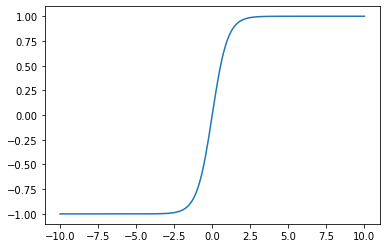

In [7]:
# Coding tanh:

y_tanh = (np.exp(X) - np.exp(-X)) / (np.exp(X) + np.exp(-X))

plt.plot(X, y_tanh);

**Softsign**: $f(x) = \frac{x}{1 + |x|}$

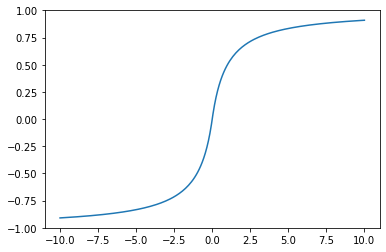

In [8]:
# Coding Softsign:

y_ss = X / (1 + np.abs(X))

plt.plot(X, y_ss);

Notice that ReLU ("Rectified Linear Unit") increases without bound as $x\rightarrow\infty$. The advantages and drawbacks of this are discussed on [this page on stackexchange](https://stats.stackexchange.com/questions/126238/what-are-the-advantages-of-relu-over-sigmoid-function-in-deep-neural-networks)

#### Softmax

## GUI!

[Tinker with a neural network online](https://playground.tensorflow.org)

In [16]:
import pandas as pd

In [20]:
from keras import Sequential
from keras.layers import Dense, Dropout




In [21]:
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [18]:
df = pd.read_csv('titanic.csv')

FileNotFoundError: [Errno 2] File b'titanic.csv' does not exist: b'titanic.csv'

In [ ]:
X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [31]:
model = keras.Sequential()
# Hidden layer 1
model.add(Dense(4, activation = 'relu', input_dim = 14))

# Hidden layer 2
model.add(Dense(8, activation = 'relu'))

# Outout Layer
model.add(Dense(1, activation = 'relu'))

In [32]:
model.compile(optimizer = 'sgd',
             loss = 'binary_crossentropy',
             metrics = ['accuracy', 'binary_accuracy'])

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 4)                 60        
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 109
Trainable params: 109
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,
          y_train,
         epochs = 500,
         batch_size = 20,
         validation_data=(X_test, y_test))